In [19]:
#Importing neccesary libraries 
import pandas as pd
import seaborn as sns
import calendar
import difflib
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
#Loading dataset and copy path and retrieve data
path="/kaggle/input/online-dataset/online_retail.csv"
data=pd.read_csv(path)
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


# **Data Description**

In [21]:
#Handling Missing Values: Removing NaN Entries from the DataFrame
data=data.dropna()
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [22]:
#Descriptive Statistics for the 'Description' Column in the DataFrame
data['Description'].describe()

count                                 406829
unique                                  3896
top       WHITE HANGING HEART T-LIGHT HOLDER
freq                                    2070
Name: Description, dtype: object

In [23]:
#Identifying Duplicate Values in the 'Description' Column of the DataFrame
data['Description'].duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
541904     True
541905     True
541906     True
541907     True
541908     True
Name: Description, Length: 406829, dtype: bool

In [24]:
#Displaying the Number of Rows and Columns in the DataFrame 'data
rows=data.shape[0]
print("rows:",rows)
columns=data.shape[1]
print("columns:",columns)

rows: 406829
columns: 8


In [25]:
#Creating a Frequency Distribution of Product Descriptions in a DataFrame
a=data['Description'].value_counts()
a

Description
WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
                                      ... 
ANTIQUE RASPBERRY FLOWER EARRINGS        1
WALL ART,ONLY ONE PERSON                 1
GOLD/AMBER DROP EARRINGS W LEAF          1
INCENSE BAZAAR PEACH                     1
PINK BAROQUE FLOCK CANDLE HOLDER         1
Name: count, Length: 3896, dtype: int64

In [26]:
#Creating a DataFrame with Product Descriptions and Their Respective Counts
df=data['Description'].value_counts().rename_axis('Product').reset_index(name='count')
df

,Product,count
0,WHITE HANGING HEART T-LIGHT HOLDER,2070
1,REGENCY CAKESTAND 3 TIER,1905
2,JUMBO BAG RED RETROSPOT,1662
3,ASSORTED COLOUR BIRD ORNAMENT,1418
4,PARTY BUNTING,1416
...,...,...
3891,ANTIQUE RASPBERRY FLOWER EARRINGS,1
3892,"WALL ART,ONLY ONE PERSON",1
3893,GOLD/AMBER DROP EARRINGS W LEAF,1
3894,INCENSE BAZAAR PEACH,1


# **Finding Popular Items Globally**

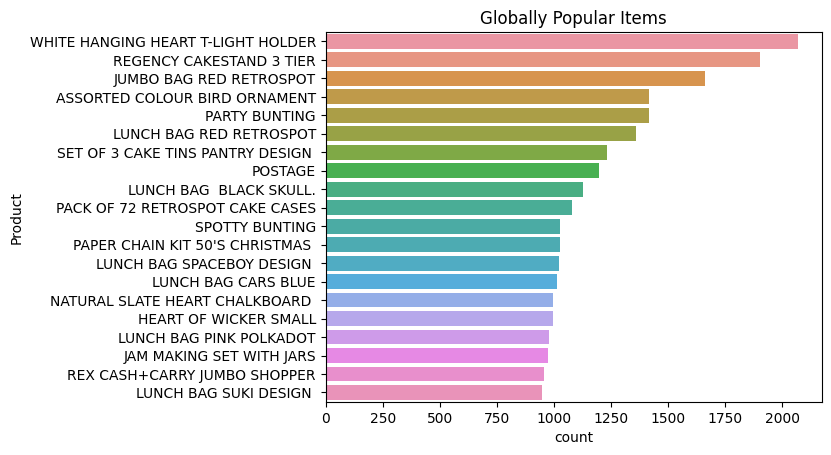

In [27]:
#Visualizing the Top 20 Globally Popular Items Using a Barplot
sns.barplot(y=df['Product'].head(20),x=df['count'].head(20),data=df)
plt.title("Globally Popular Items")
plt.show()

 # **Finding Popular Items Country-Wise**

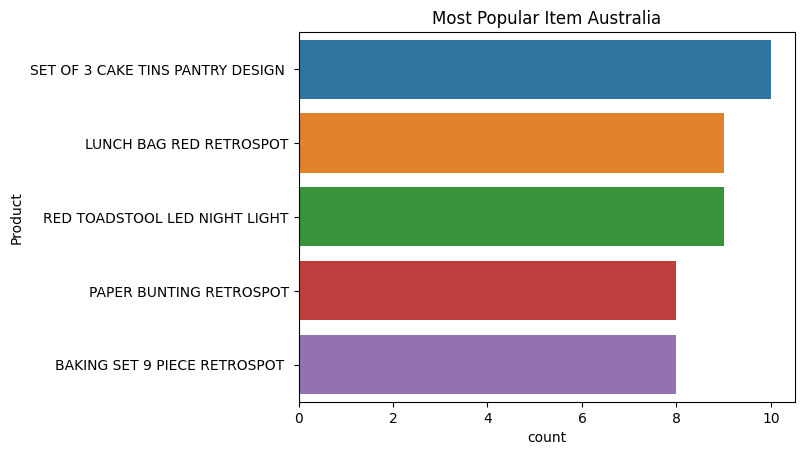

0    Most Popular Item in Australia is SET OF 3 CAK...
Name: Product, dtype: object


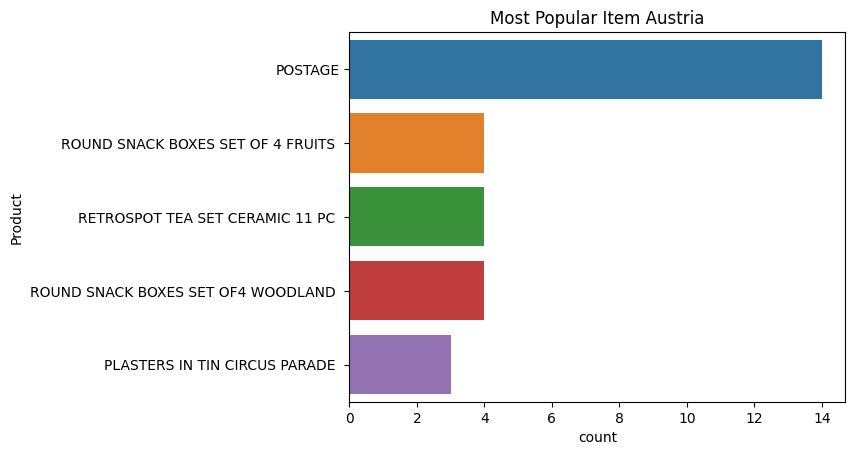

0    Most Popular Item in Austria is POSTAGE
Name: Product, dtype: object


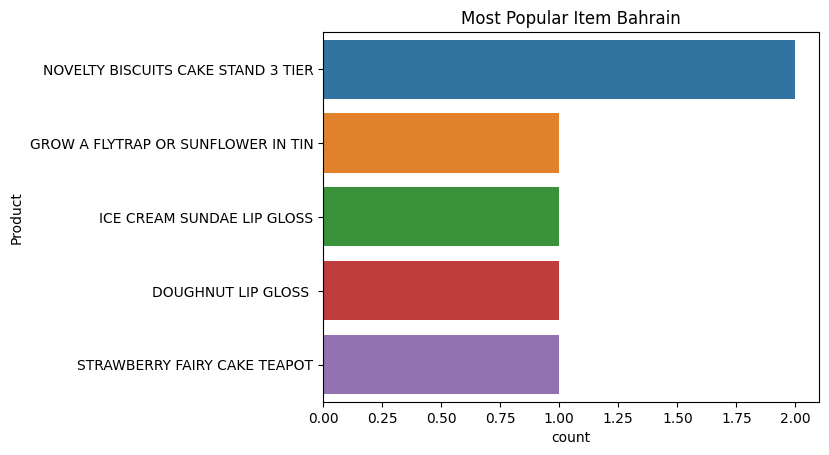

0    Most Popular Item in Bahrain is NOVELTY BISCUI...
Name: Product, dtype: object


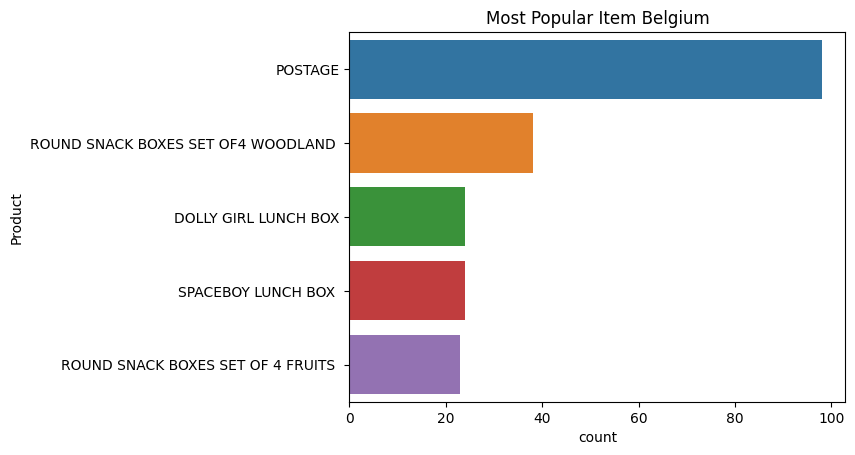

0    Most Popular Item in Belgium is POSTAGE
Name: Product, dtype: object


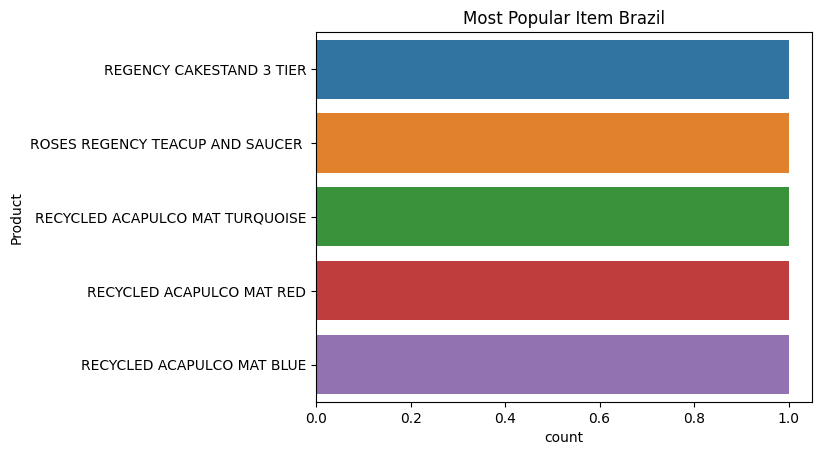

0    Most Popular Item in Brazil is REGENCY CAKESTA...
Name: Product, dtype: object


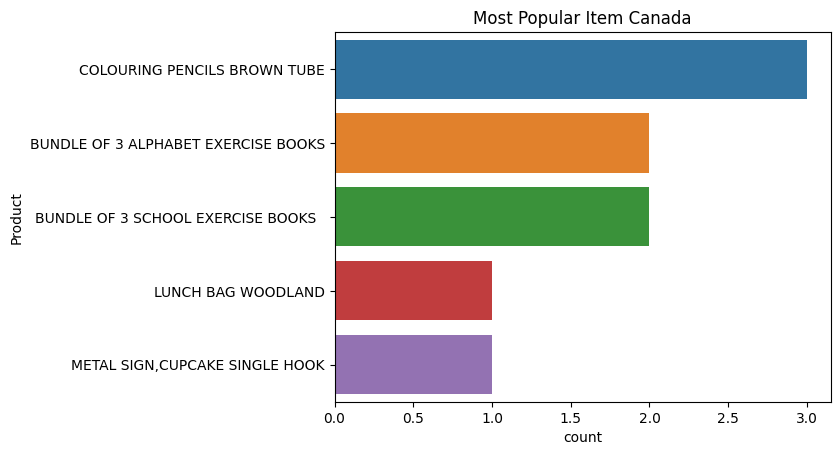

0    Most Popular Item in Canada is COLOURING PENCI...
Name: Product, dtype: object


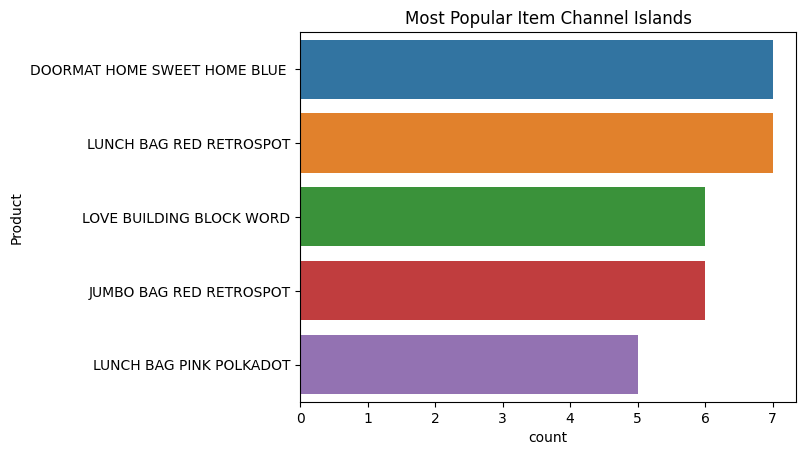

0    Most Popular Item in Channel Islands is DOORMA...
Name: Product, dtype: object


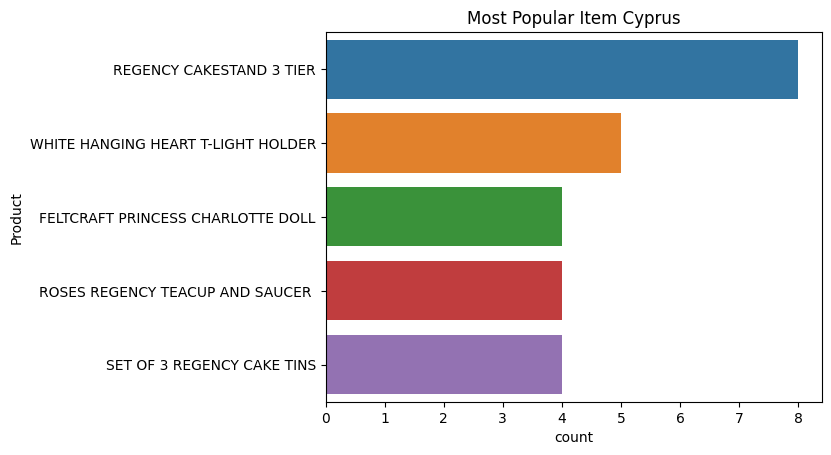

0    Most Popular Item in Cyprus is REGENCY CAKESTA...
Name: Product, dtype: object


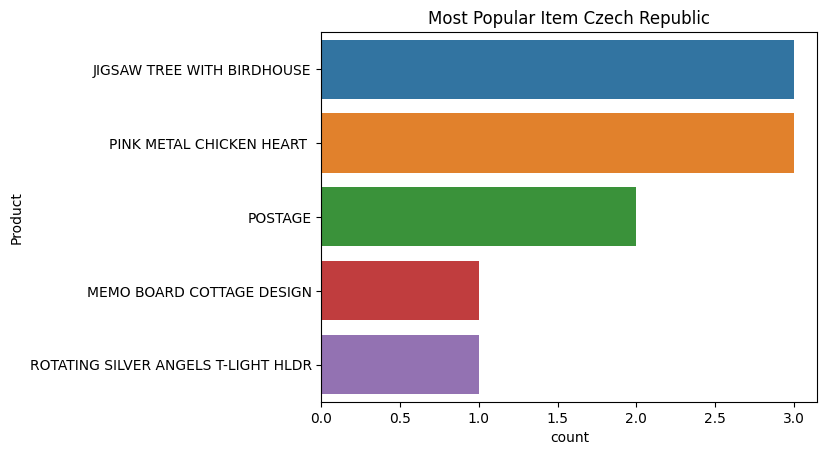

0    Most Popular Item in Czech Republic is JIGSAW ...
Name: Product, dtype: object


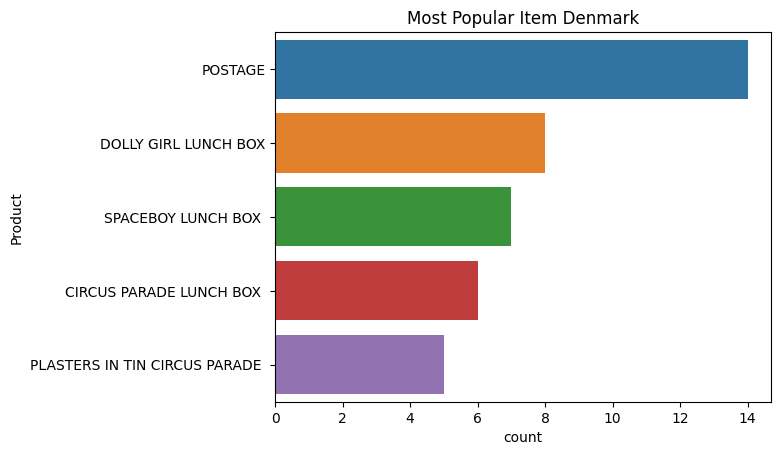

0    Most Popular Item in Denmark is POSTAGE
Name: Product, dtype: object


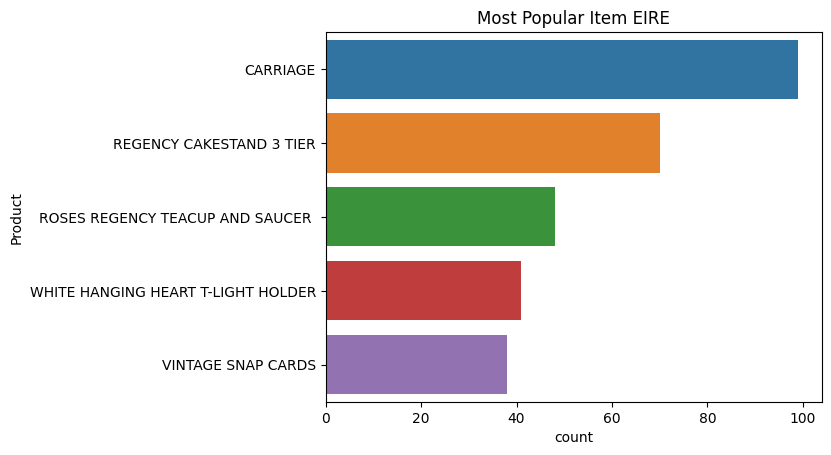

0    Most Popular Item in EIRE is CARRIAGE
Name: Product, dtype: object


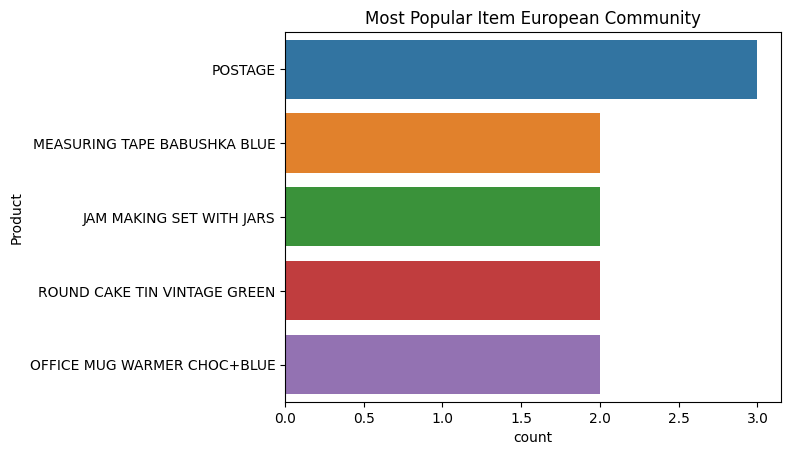

0    Most Popular Item in European Community is POS...
Name: Product, dtype: object


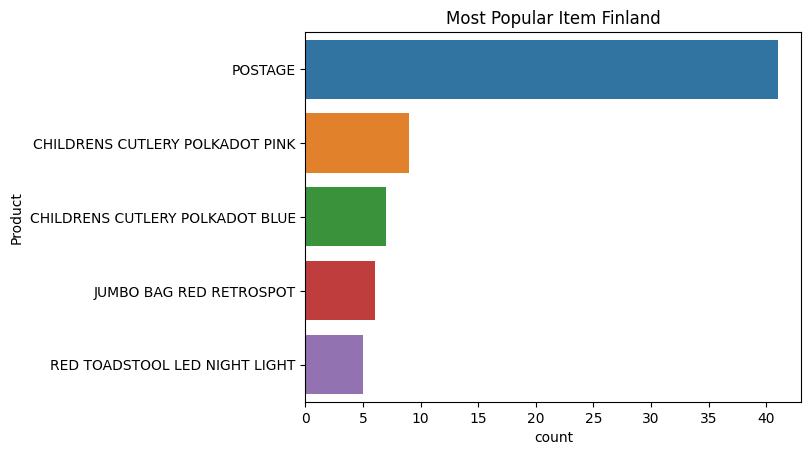

0    Most Popular Item in Finland is POSTAGE
Name: Product, dtype: object


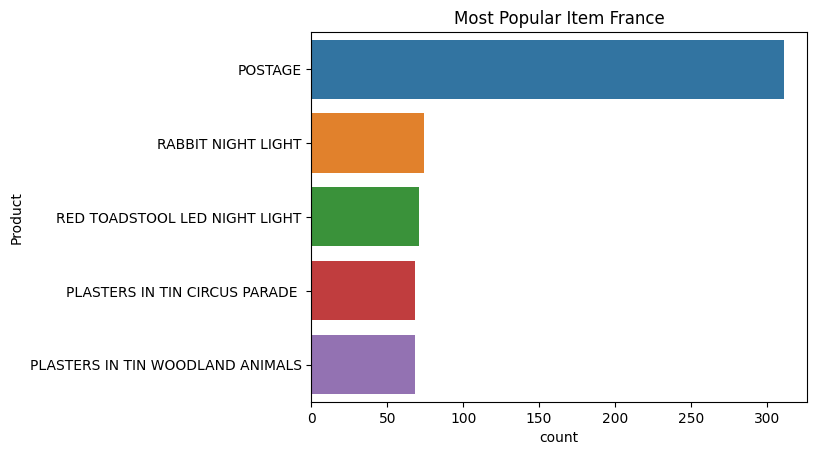

0    Most Popular Item in France is POSTAGE
Name: Product, dtype: object


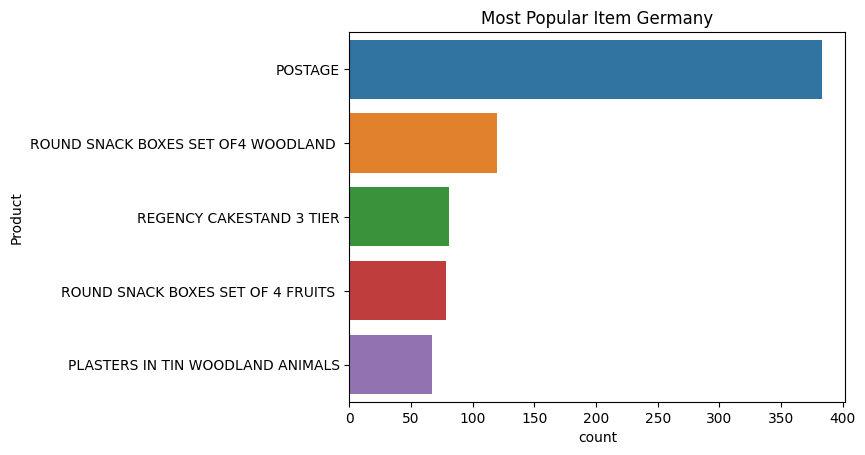

0    Most Popular Item in Germany is POSTAGE
Name: Product, dtype: object


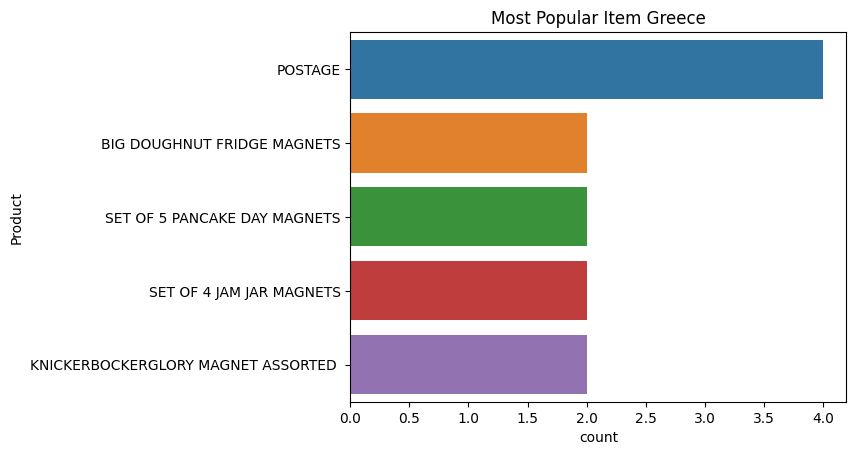

0    Most Popular Item in Greece is POSTAGE
Name: Product, dtype: object


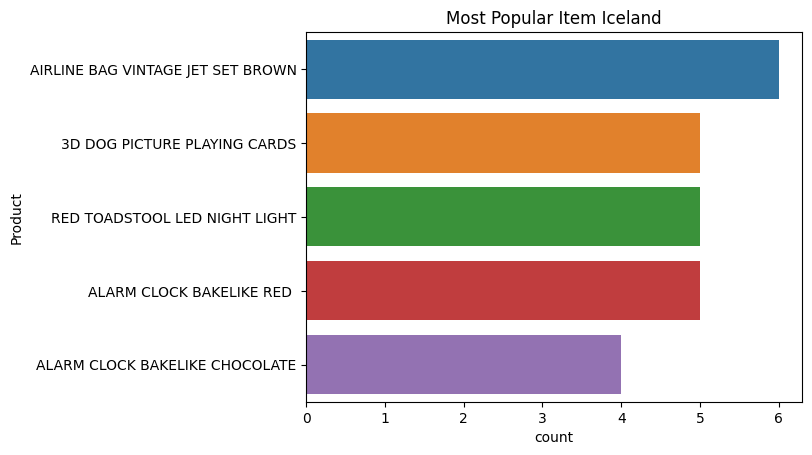

0    Most Popular Item in Iceland is AIRLINE BAG VI...
Name: Product, dtype: object


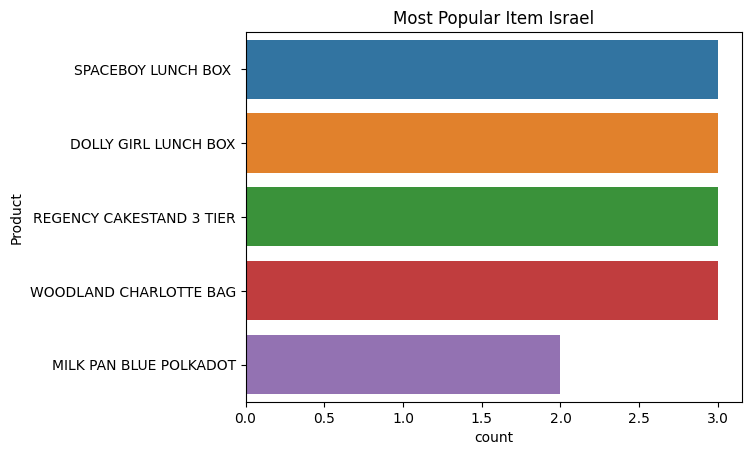

0    Most Popular Item in Israel is SPACEBOY LUNCH ...
Name: Product, dtype: object


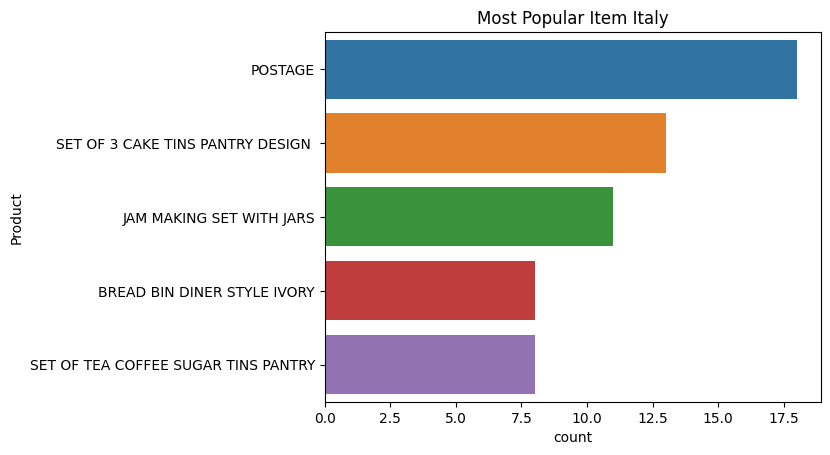

0    Most Popular Item in Italy is POSTAGE
Name: Product, dtype: object


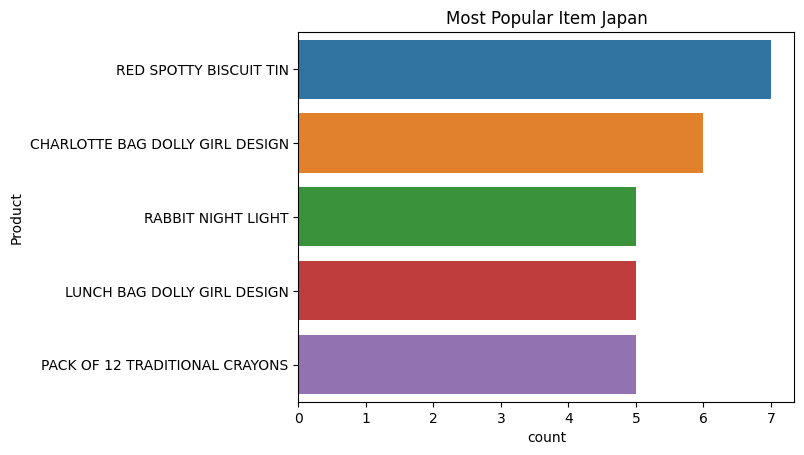

0    Most Popular Item in Japan is RED SPOTTY BISCU...
Name: Product, dtype: object


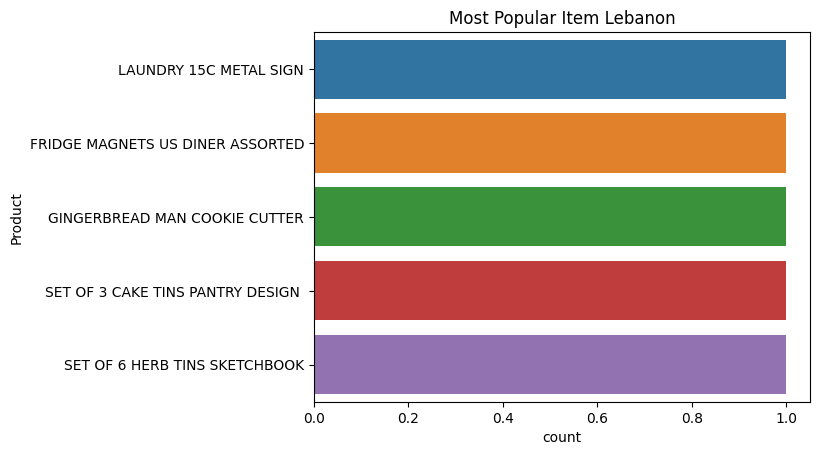

0    Most Popular Item in Lebanon is LAUNDRY 15C ME...
Name: Product, dtype: object


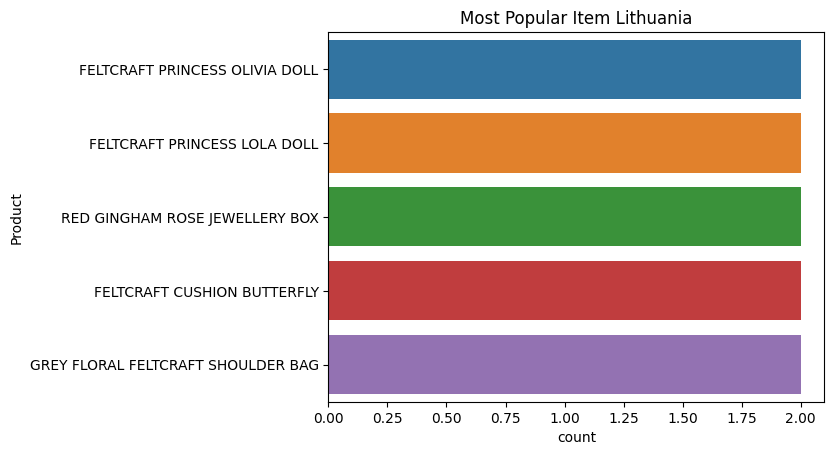

0    Most Popular Item in Lithuania is FELTCRAFT PR...
Name: Product, dtype: object


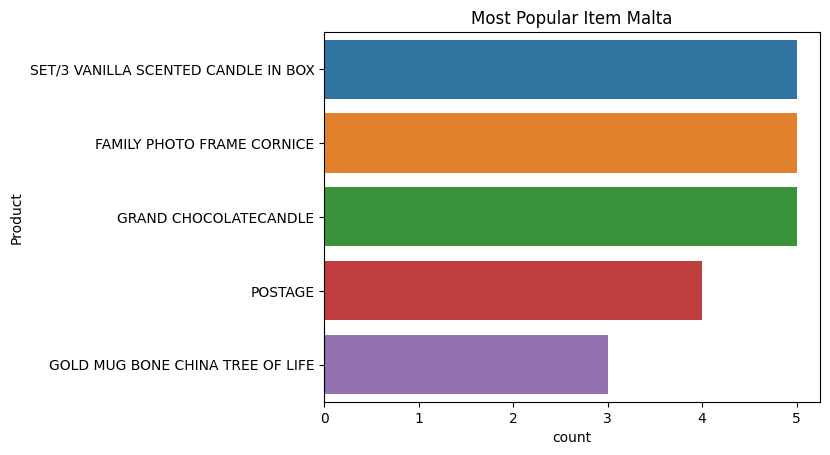

0    Most Popular Item in Malta is SET/3 VANILLA SC...
Name: Product, dtype: object


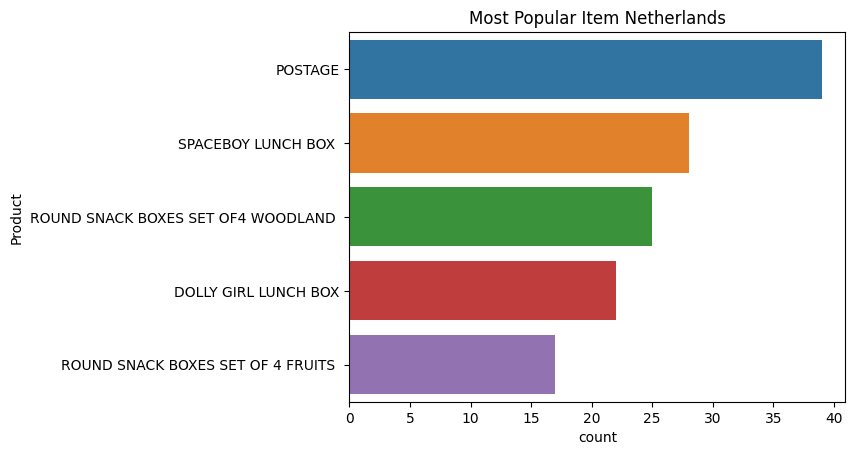

0    Most Popular Item in Netherlands is POSTAGE
Name: Product, dtype: object


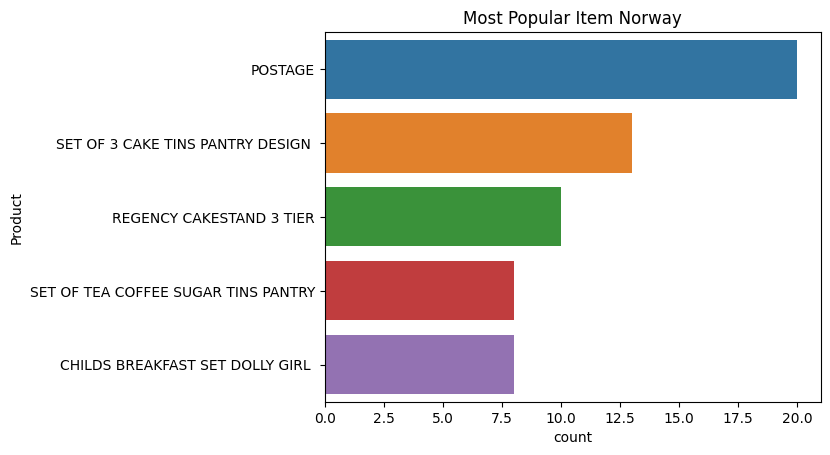

0    Most Popular Item in Norway is POSTAGE
Name: Product, dtype: object


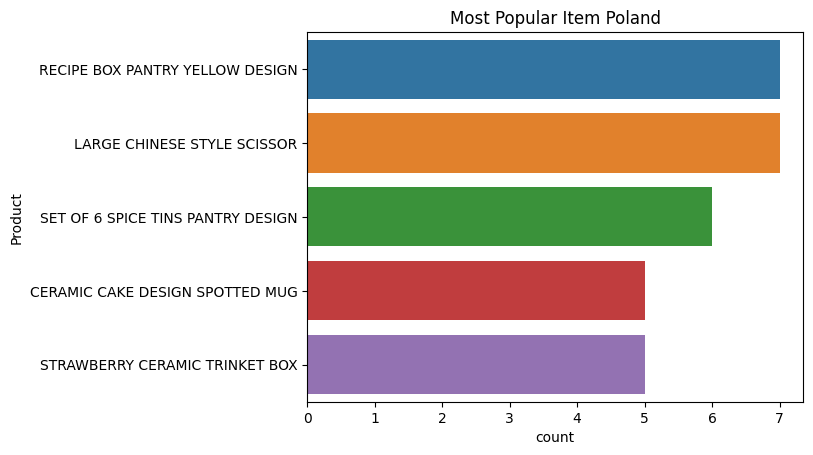

0    Most Popular Item in Poland is RECIPE BOX PANT...
Name: Product, dtype: object


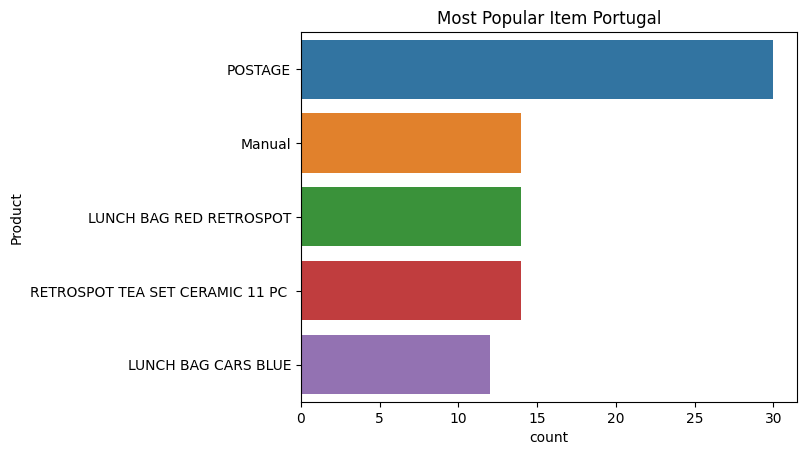

0    Most Popular Item in Portugal is POSTAGE
Name: Product, dtype: object


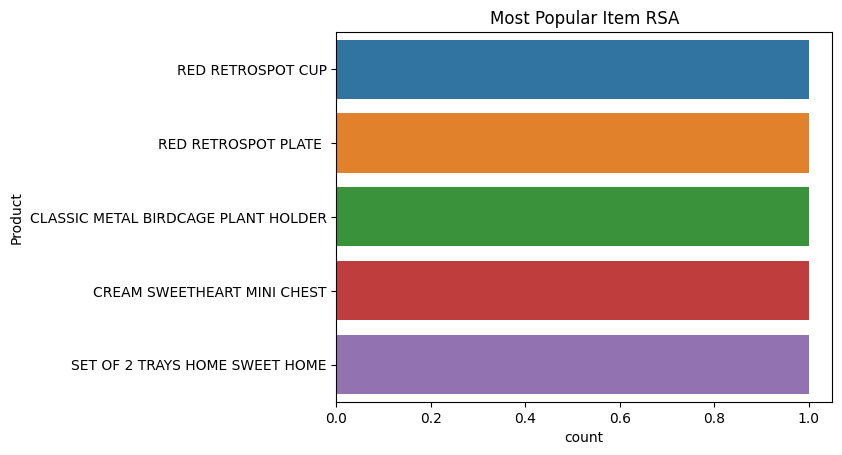

0    Most Popular Item in RSA is RED RETROSPOT CUP
Name: Product, dtype: object


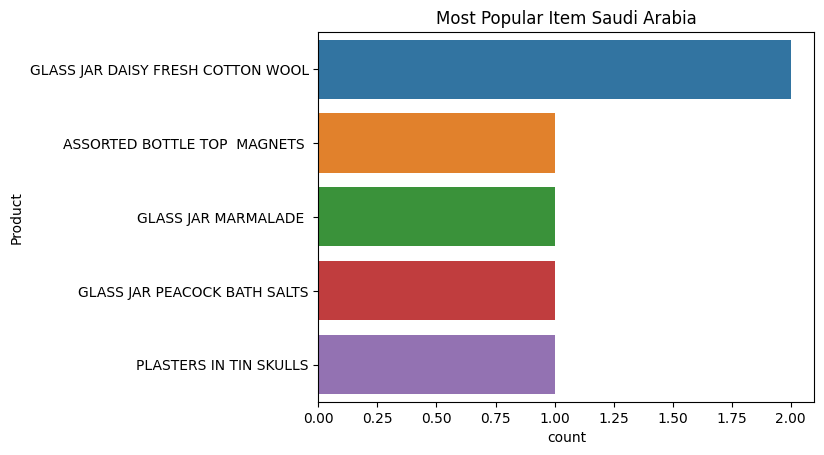

0    Most Popular Item in Saudi Arabia is GLASS JAR...
Name: Product, dtype: object


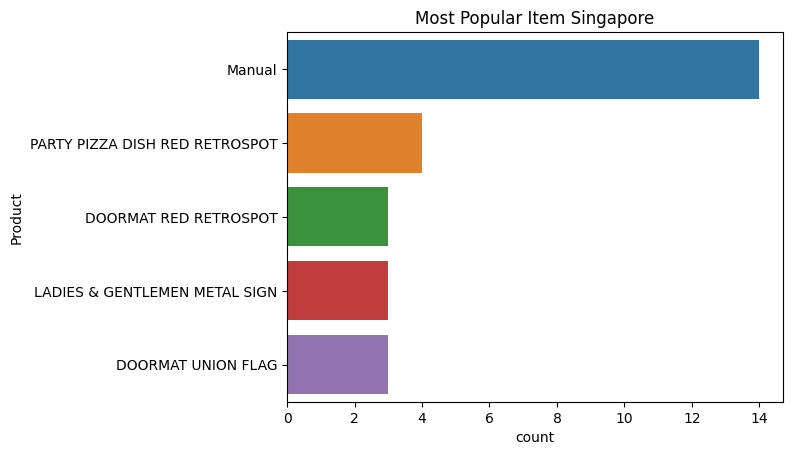

0    Most Popular Item in Singapore is Manual
Name: Product, dtype: object


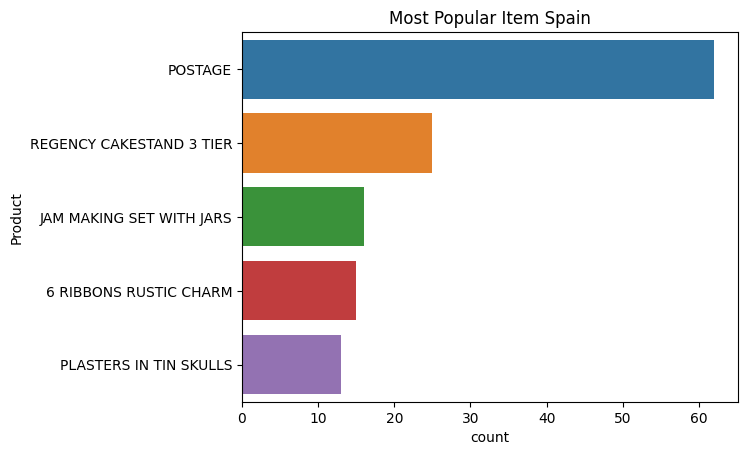

0    Most Popular Item in Spain is POSTAGE
Name: Product, dtype: object


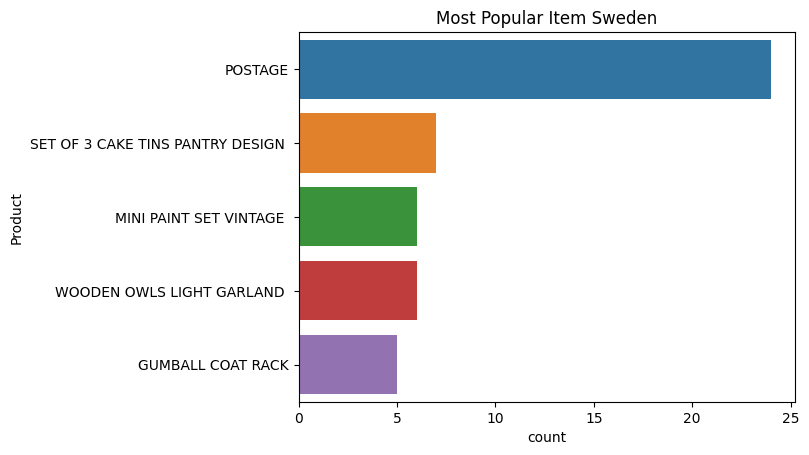

0    Most Popular Item in Sweden is POSTAGE
Name: Product, dtype: object


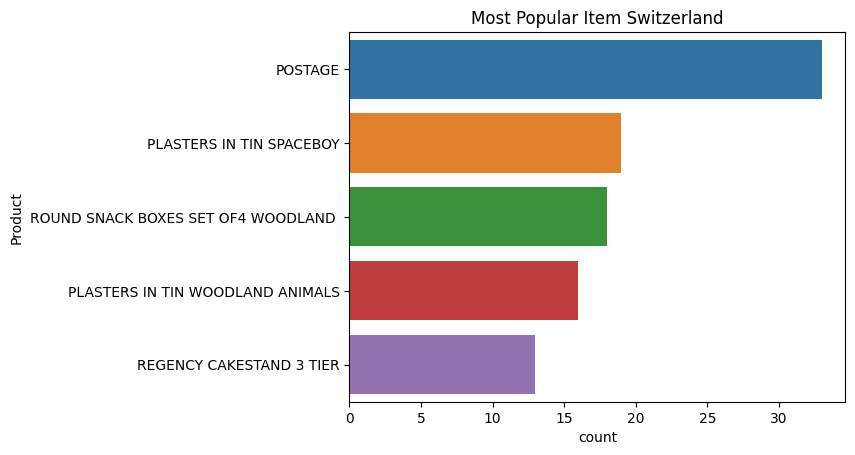

0    Most Popular Item in Switzerland is POSTAGE
Name: Product, dtype: object


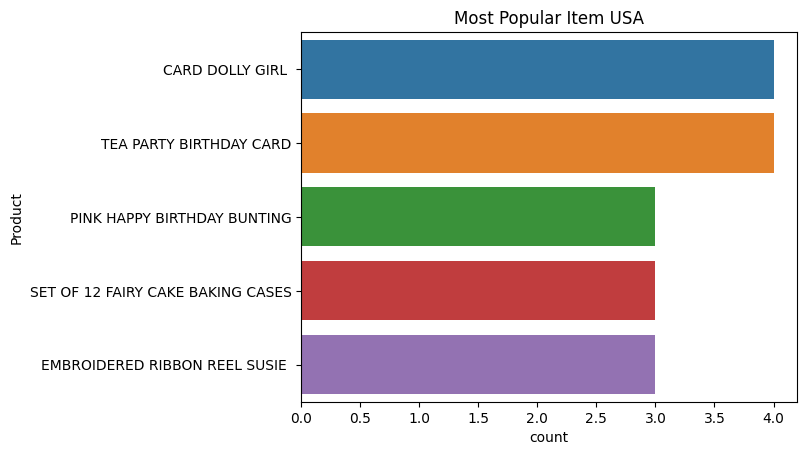

0    Most Popular Item in USA is CARD DOLLY GIRL 
Name: Product, dtype: object


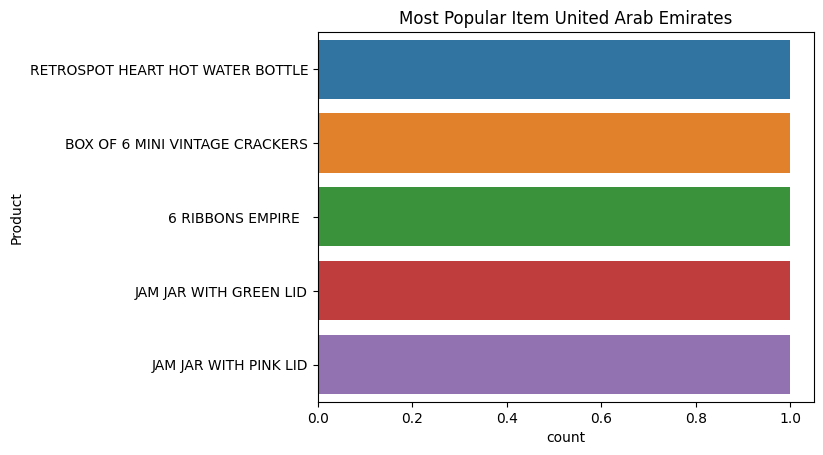

0    Most Popular Item in United Arab Emirates is R...
Name: Product, dtype: object


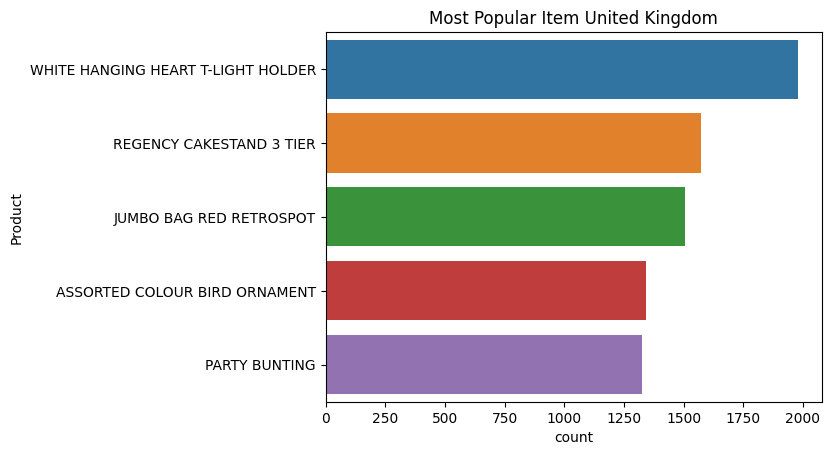

0    Most Popular Item in United Kingdom is WHITE H...
Name: Product, dtype: object


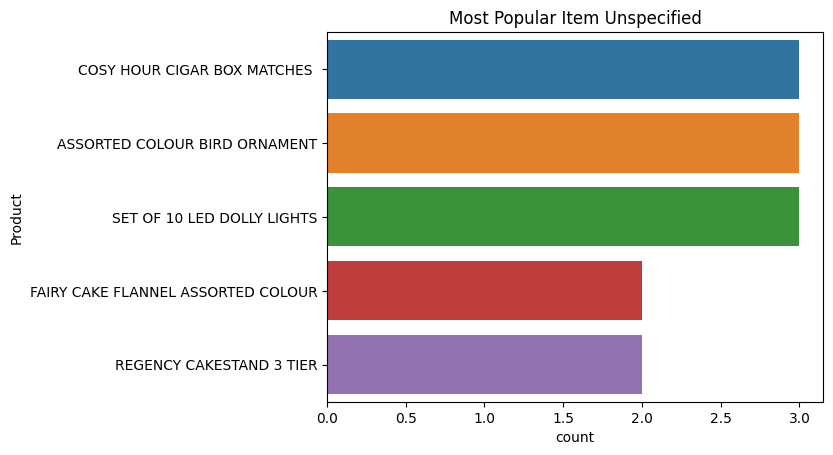

0    Most Popular Item in Unspecified is COSY HOUR ...
Name: Product, dtype: object


In [28]:
#Analyzing Most Popular Items in Different Countries: A Grouped Barplot Comparison
df1=data.groupby('Country')
i=1

for name,cont in df1:
    df2=df1.get_group(name)
    df2=df2['Description'].value_counts().rename_axis('Product').reset_index(name='count')
    sns.barplot(y=df2['Product'].head(5),x=df2['count'].head(10),data=df2)
    s="Most Popular Item "+name
    plt.title(s)
    plt.show()
    s1="Most Popular Item in "+name+ " is "+df2['Product'].head(1)
    print(s1)
    i=i+1

# **Finding Popular Items Month-Wise**

In [29]:
#Extracting and Adding a 'Month' Column from the 'InvoiceDate' in the DataFrame
data["Month"]=data["InvoiceDate"].str[5:7]
data

/tmp/ipykernel_48/578544219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Month"]=data["InvoiceDate"].str[5:7]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12


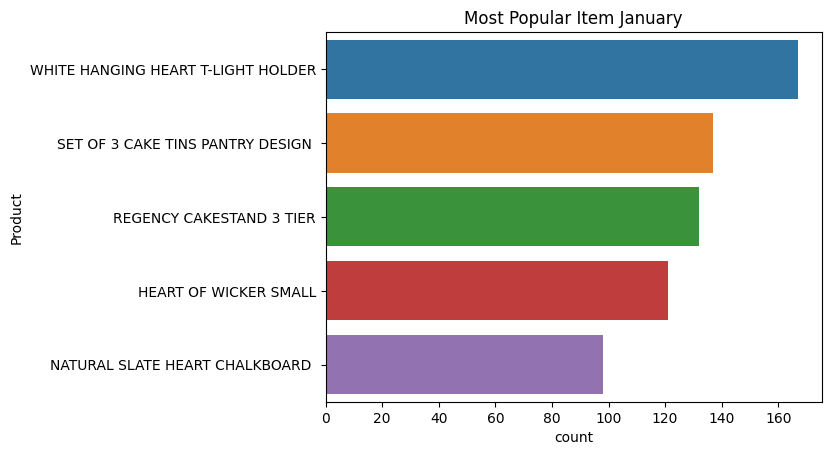

0    Most Popular Item in January is WHITE HANGING ...
Name: Product, dtype: object


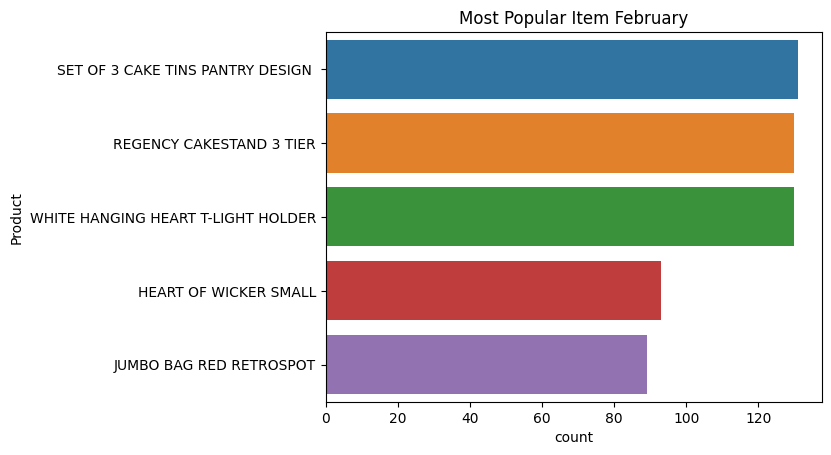

0    Most Popular Item in February is SET OF 3 CAKE...
Name: Product, dtype: object


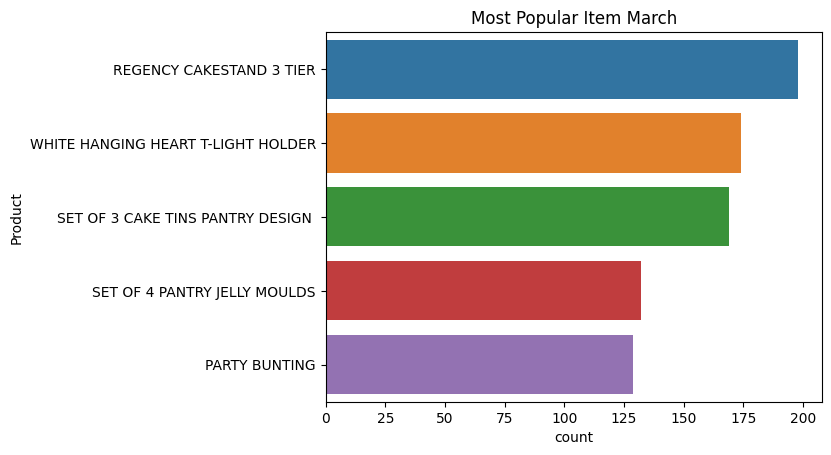

0    Most Popular Item in March is REGENCY CAKESTAN...
Name: Product, dtype: object


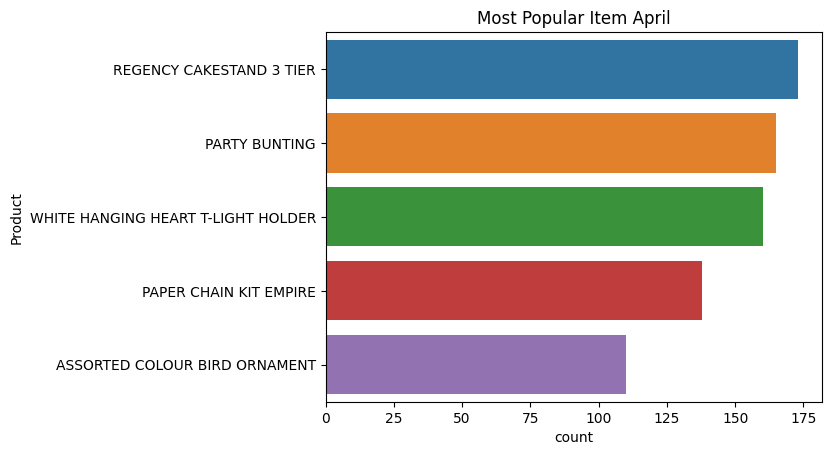

0    Most Popular Item in April is REGENCY CAKESTAN...
Name: Product, dtype: object


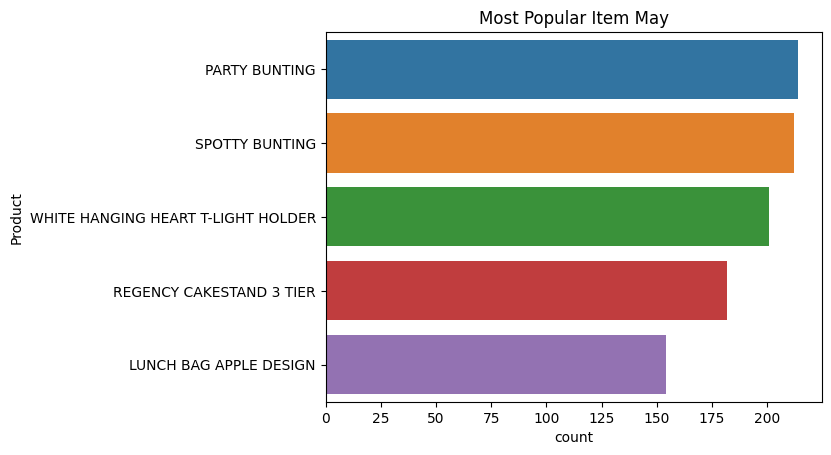

0    Most Popular Item in May is PARTY BUNTING
Name: Product, dtype: object


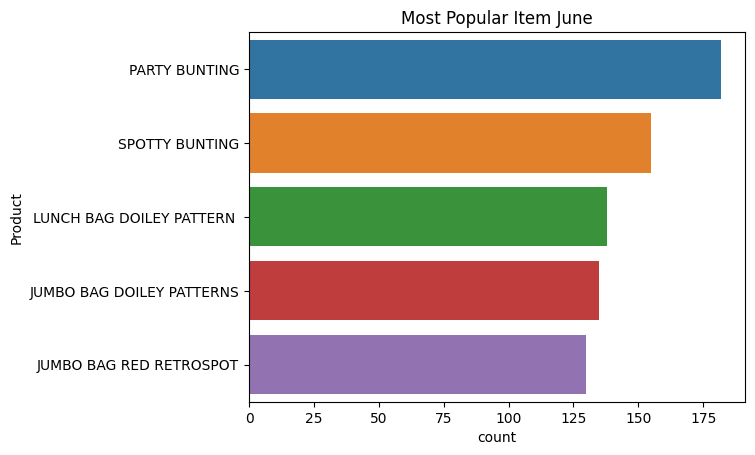

0    Most Popular Item in June is PARTY BUNTING
Name: Product, dtype: object


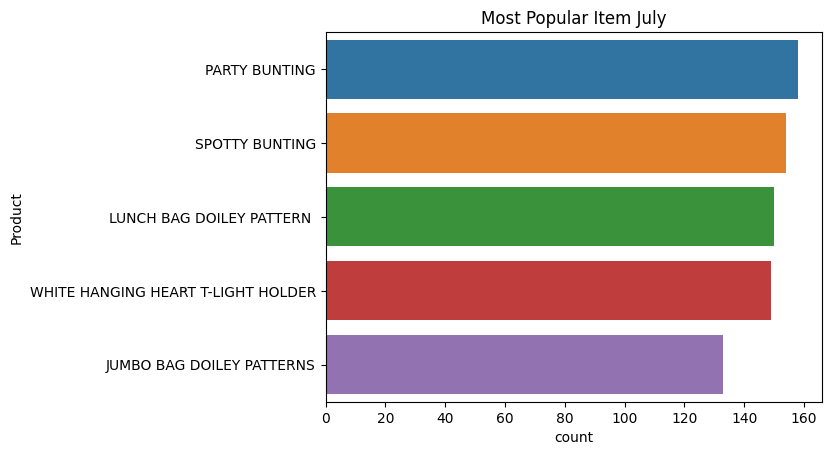

0    Most Popular Item in July is PARTY BUNTING
Name: Product, dtype: object


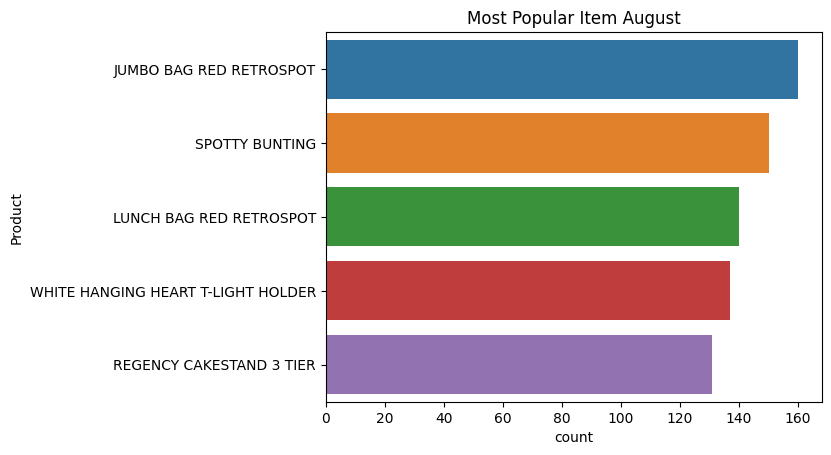

0    Most Popular Item in August is JUMBO BAG RED R...
Name: Product, dtype: object


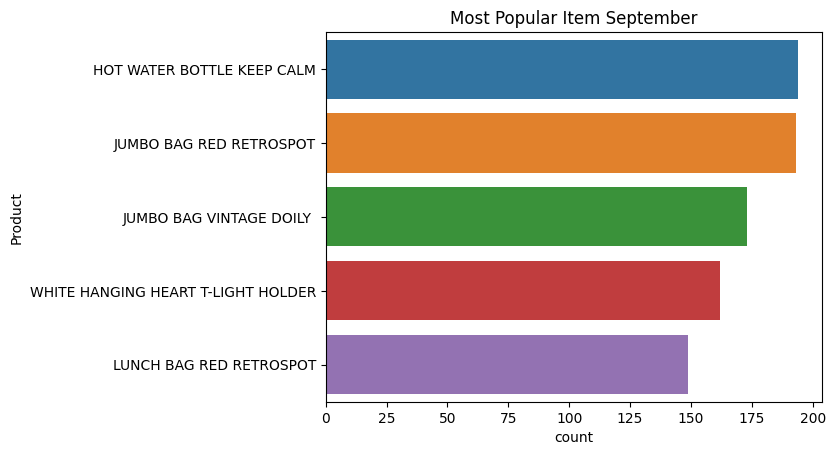

0    Most Popular Item in September is HOT WATER BO...
Name: Product, dtype: object


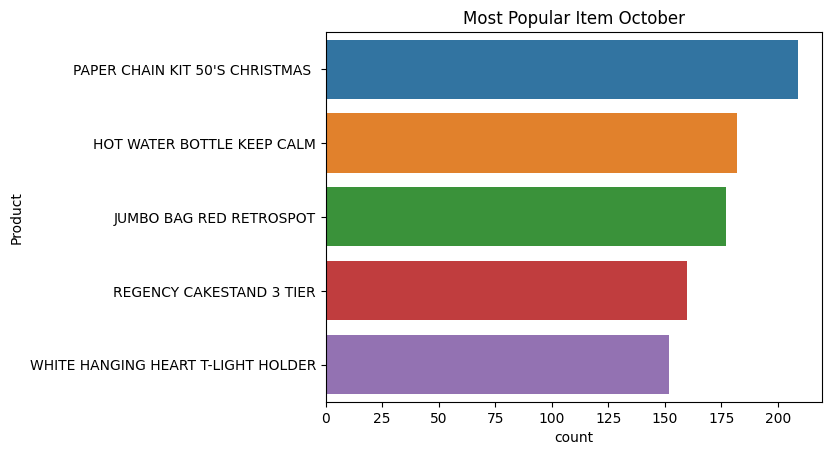

0    Most Popular Item in October is PAPER CHAIN KI...
Name: Product, dtype: object


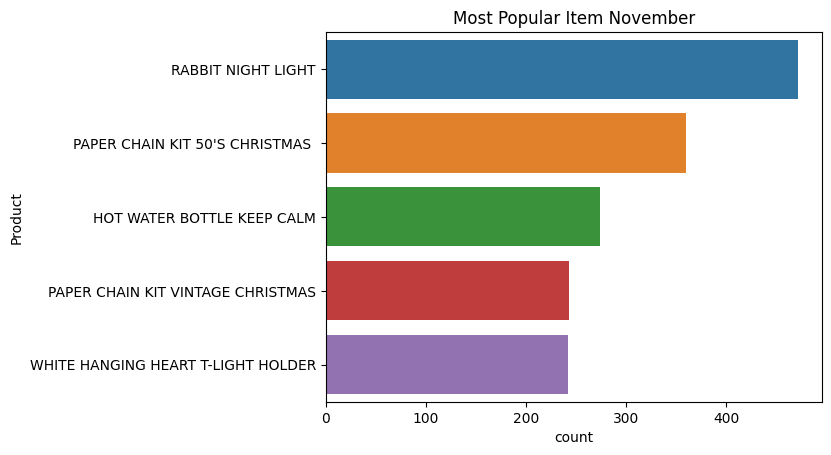

0    Most Popular Item in November is RABBIT NIGHT ...
Name: Product, dtype: object


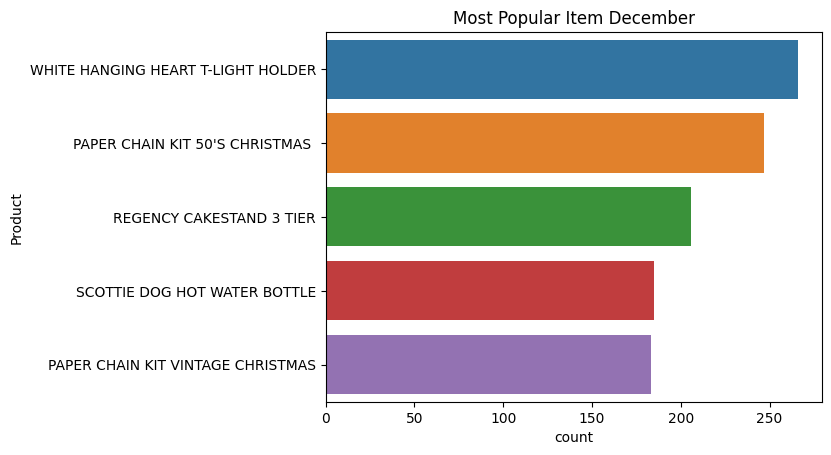

0    Most Popular Item in December is WHITE HANGING...
Name: Product, dtype: object


In [30]:
#Analyzing Monthly Trends: Most Popular Items and Their Counts for Each Month
df3=data.groupby('Month')
i=1

for name,cont in df3:
    name1=calendar.month_name[int(name)]
    df4=df3.get_group(name)
    df4=df4['Description'].value_counts().rename_axis('Product').reset_index(name='count')
    sns.barplot(y=df4['Product'].head(5),x=df4['count'].head(10),data=df4)
    s="Most Popular Item "+name1
    plt.title(s)
    plt.show()
    s1="Most Popular Item in "+name1+ " is "+df4['Product'].head(1)
    print(s1)
    i=i+1

# **Functions to Analyse & Print Recommendations**

In [31]:
# Use the duplicated method to identify duplicates in the specified column
duplicates = data.pivot_table(index=['Description'],aggfunc='size').rename_axis('Product').reset_index(name='count')

# Print or use the result as needed
print(duplicates)

#Cleaning and Standardizing Text Data: Converting 'Product' Column to Lowercase and Adding an 'index' Column
def clean(name):
    result=str(name.lower())
    return(result)

duplicates['Description']=duplicates["Product"].apply(clean)
duplicates=duplicates.assign(index=range(len(duplicates)))
duplicates

                               Product  count
0        4 PURPLE FLOCK DINNER CANDLES     39
1        50'S CHRISTMAS GIFT BAG LARGE    110
2                    DOLLY GIRL BEAKER    140
3          I LOVE LONDON MINI BACKPACK     70
4          I LOVE LONDON MINI RUCKSACK      1
...                                ...    ...
3891   ZINC T-LIGHT HOLDER STARS SMALL    241
3892    ZINC TOP  2 DOOR WOODEN SHELF      11
3893  ZINC WILLIE WINKIE  CANDLE STICK    193
3894       ZINC WIRE KITCHEN ORGANISER     12
3895  ZINC WIRE SWEETHEART LETTER TRAY     20

[3896 rows x 2 columns]


,Product,count,Description,index
0,4 PURPLE FLOCK DINNER CANDLES,39,4 purple flock dinner candles,0
1,50'S CHRISTMAS GIFT BAG LARGE,110,50's christmas gift bag large,1
2,DOLLY GIRL BEAKER,140,dolly girl beaker,2
3,I LOVE LONDON MINI BACKPACK,70,i love london mini backpack,3
4,I LOVE LONDON MINI RUCKSACK,1,i love london mini rucksack,4
...,...,...,...,...
3891,ZINC T-LIGHT HOLDER STARS SMALL,241,zinc t-light holder stars small,3891
3892,ZINC TOP 2 DOOR WOODEN SHELF,11,zinc top 2 door wooden shelf,3892
3893,ZINC WILLIE WINKIE CANDLE STICK,193,zinc willie winkie candle stick,3893
3894,ZINC WIRE KITCHEN ORGANISER,12,zinc wire kitchen organiser,3894


In [32]:
#Creating TF-IDF Vectors for Text Data Using TfidfVectorizer
vectorizer=TfidfVectorizer()
vect=vectorizer.fit_transform(duplicates['Description'])
print(vect)

  (0, 314)	0.47384875131636056
  (0, 565)	0.530925823261383
  (0, 717)	0.5127056737234867
  (0, 1481)	0.4803311599322848
  (1, 1031)	0.41475442632031
  (1, 114)	0.3735821621525685
  (1, 813)	0.47287999311389567
  (1, 400)	0.3832940529344711
  (1, 35)	0.5638131916395636
  (2, 157)	0.6650539016186924
  (2, 818)	0.5257854051348654
  (2, 587)	0.5303329291010697
  (3, 111)	0.6179607049312806
  (3, 1158)	0.4290250915573877
  (3, 1082)	0.49999950878894367
  (3, 1087)	0.4290250915573877
  (4, 1571)	0.6271467796346737
  (4, 1158)	0.42503726172097234
  (4, 1082)	0.49535196486067706
  (4, 1087)	0.42503726172097234
  (5, 1866)	0.46956151674438495
  (5, 1267)	0.4933956815647955
  (5, 613)	0.4088236372793164
  (5, 1245)	0.6074009524256885
  (6, 558)	0.4961063209352801
  :	:
  (3890, 1031)	0.39796907210704274
  (3891, 1759)	0.5737035435727462
  (3891, 2038)	0.46013939022694283
  (3891, 915)	0.3899568275959636
  (3891, 1693)	0.390699714119591
  (3891, 1059)	0.3929674180537274
  (3892, 592)	0.445451964

In [33]:
similarities=cosine_similarity(vect)

In [34]:
pip install fuzzywuzzy

Note: you may need to restart the kernel to use updated packages.


# **Predict**

In [36]:
from fuzzywuzzy import process

# function to recommend products
def recommend(product):
    prod_list = duplicates['Description'].tolist()
    match_close, confidence = process.extractOne(product, prod_list)
    prod_desc = match_close
    print("Closest matching product description:", prod_desc)
    prod_ind = duplicates[duplicates.Description == prod_desc]['index'].values[0]
    similarity = list(enumerate(similarities[prod_ind]))
    sorted_p = sorted(similarity, key=lambda x: x[1], reverse=True)[:10]
    recm = ""
    for idx, prod in sorted_p:
        p = duplicates[duplicates.index == idx]['Description'].values[0].capitalize()
        recm += f"{p}\n"
    return recm

# taking the user input
user = input("Enter the product: ")
xlist = recommend(user)
print(xlist)


Enter the product:  b


Closest matching product description: sombrero 
Sombrero 
 4 purple flock dinner candles
 50's christmas gift bag large
 dolly girl beaker
 i love london mini backpack
 i love london mini rucksack
 nine drawer office tidy
 oval wall mirror diamante 
 red spot gift bag large
 set 2 tea towels i love london 

